# HW 4 Numerical linear algebra ( 50 pts)


## Please restart the kernel and run all before you submit !


## Your Name: 

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Part 1: PCA (25 pts)

In this part, we will use PCA on some real dataset. 

Reuqirements:
1. You should write your own code. You are not allowed to use `sklear.decomposition.PCA` command. (5 pts)

2. Your solution should contain two functions. Function 1 takes data matrix X and integer k as inputs, and returns first k principal components. Function 2 takes data matrix X as input and a threshold $0\leq\eta\leq1$ as inputs, and returns an integer k such that the first $k$ principal components (smallest) has explained variance ratio more than $\eta$. **Your function should work for any data matrix X. In other words, you cannot use any global variable in your function.** (10 pts)

3. Visualize your new datasets in 2D and state your observations. (3 pts)

4. Report the smallest number of principal components reuired to explain 80% variance ratio for both datasets. (2 pts)

5. Function docstrings are required. You should also use inline comments and markdown to explain your code and make conclusions. (5 pts)

Hints:
1. You can assume that each row in $X$ represents a data.
2. Sample codes in lecture notes are helpful.

Datasets:
1. diabetes dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
2. swiss roll dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

Updates:
1. In above datasets, the last column is the correct labels. So when you do PCA, you should not use the last column.
2. When you visualize your 2D data samples, you should use different colors for different classes(labels). The correct labels are included in the last column of each dataset.

In [2]:
diab_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
swiss_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

diab = pd.read_csv(diab_url)
swiss = pd.read_csv(swiss_url)

diab_target = diab['Outcome']
swiss_target = swiss['label']

In [3]:
# your solution here
def first_k_components(X, k):
    '''
    Runs the PCA algorithm to return the first 'k' principal components of a dataset.

    Args:
        1) X (dataframe): dataset of interest
        2) k (int): number of PCA components needed

    Returns:
        dataframe: returns X with the first k princiapl components
    '''

    # select all columns except last column (target)
    X = X.iloc[:, :-1]

    # standardize all the columns
    X_standard = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

    # extract SVD components of standardized data
    U, S, V = np.linalg.svd(X_standard)

    # perform PCA 
    X_pca = X_standard @ V.T

    # return first k components
    return X_pca.iloc[:, :k]


def min_k_components(X, threshold):
    '''
    Runs the PCA algorithm on a dataset to find the smallest number of principal components needed to explain a given variance ratio.

    Args:
        1) X (dataframe): dataset of interest
        2) threshold (float): variance ratio wanted

    Returns:
        int: smallest number of principal components needed to explain a variance ratio of at least the threshold value
    '''

    # find all PCA components
    X_pca = first_k_components(X, X.shape[1] - 1)

    # calculate how much variance is accounted by each component
    variances = np.var(X_pca, axis = 0)

    # calculate the percentage of total variation each component accounts for
    variance_ratios = variances / np.sum(variances)

    # find the total percentage of variation all the components account for once an additional component is added
    total_variance_ratio = np.cumsum(variance_ratios)

    # check when an additional component accounts for the total percentage of variation being above the threshold
    threshold_check = total_variance_ratio >= threshold

    # return index position + 1 of that additional component crossing the threshold
    return threshold_check.idxmax() + 1

Text(0, 0.5, 'second component')

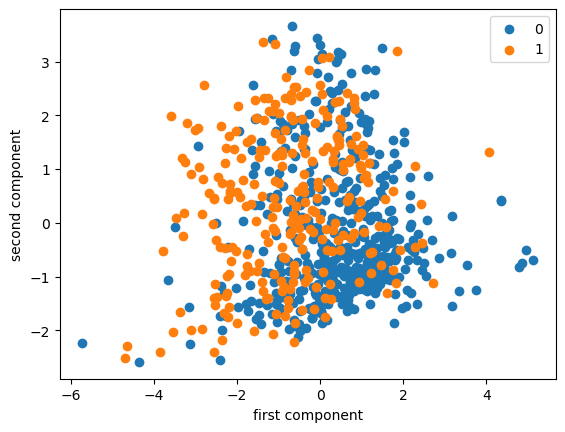

In [4]:
diab_pca = first_k_components(diab, diab.shape[1])

for label in np.unique(diab_target):
    plt.scatter(diab_pca[diab_target == label][0], diab_pca[diab_target == label][1], label = label)
    plt.legend()
    
plt.xlabel('first component')
plt.ylabel('second component')

For the first two PCA components of the diabetes dataset, there doesn't seem to be any distinguishable patterns or clusters between the two target labels. 

Text(0, 0.5, 'second component')

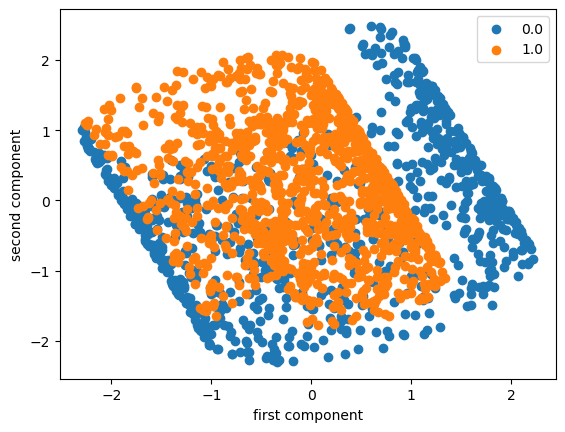

In [5]:
swiss_pca = first_k_components(swiss, swiss.shape[1])

for label in np.unique(swiss_target):
    plt.scatter(swiss_pca[swiss_target == label][0], swiss_pca[swiss_target == label][1], label = label)
    plt.legend()
    
plt.xlabel('first component')
plt.ylabel('second component')

For the first two PCA components of the swiss dataset, it seems that target label 1 is associated with points near the center while target label 0 is more spread out and covers the same range as label 1 plus some more.

In [6]:
print(f'The minimum number of components needed to explain an 80% variance ratio for the diabetes dataset is {min_k_components(diab, 0.8)}.\n')

print(f'The minimum number of components needed to explain an 80% variance ratio for the diabetes dataset is {min_k_components(swiss, 0.8)}.')

The minimum number of components needed to explain an 80% variance ratio for the diabetes dataset is 5.

The minimum number of components needed to explain an 80% variance ratio for the diabetes dataset is 3.


# Part 2: Least square (25 pts)

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Write a function to generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column. Both matrix $A$ and vector $b$ are randomly generated by using `np.random`. The distribution of $A$ or $b$ can be either standard gaussian (`np.random.randn`) or uniform (`np.random.rand`). In other words, your function should allow four different choices, which are 1. gaussian $A$ and gaussian $b$, 2. gaussian $A$ and uniform $b$, 3. uniform $A$ and gaussian $b$, and 4. uniform $A$ and uniform $b$. (5 pts)

Step 2: Use function written in step 1 to generate $A$ and $b$ with fixed number of rows $m=10000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$ (You can determine the distribution you want to use). Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$. (5 pts)

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is plotting log(time) (y-axis) vs log(N) (x-axis). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? (10 pts, 5 pts each figure)


**Requirement:**

You should write docstring for your function and inline comments for your codes. (5 pts)

In [7]:
# Your solution here.

def gen_Matrices(m, N, A_dist = 'g', b_dist = 'g'):

    '''
    Creates a matrix A of size m x n and an observation vector b of size n x 1 using either Gaussian or uniform distribution

    Args:
        1) m (int): number of rows for matrix A
        2) N (int): number of columns for A, number of rows for b
        3) A_dist (str): indicates how A should be made (Gaussian (default) or uniform)
        4) b_dist (str): indicates how b should be made (Gaussian (default) or uniform)

    Returns:
        array: m x n matrix A
        array: n x 1 vector b
    '''

    # generate matrix of size m x n with either the Guassian (default) or uniform distribution
    if A_dist == 'g':
        A = np.random.randn(m, N)
    else:
        A = np.random.rand(m, N)

    # generate vector of size n x 1 with either the Guassian (default) or uniform distribution
    if b_dist == 'g':
        b = np.random.randn(m, 1)
    else:
        b = np.random.rand(m, 1)

    return A, b
    

In [8]:
N = [1000, 2000, 4000, 8000, 16000]

# N = [1, 100, 500, 800]

# store computation times for inverse and solve methods
comp_times_inv = []
comp_times_solve = []

# loop through each column value to find out computational times
for col in N:

    A, b = gen_Matrices(10000, col)

    # computational time for inverse method
    start1 = time.time()

    np.linalg.inv(A.T @ A) @ A.T @ b

    stop1 = time.time()

    comp_times_inv.append(stop1 - start1)

    # computational time for solve method
    start2 = time.time()

    np.linalg.solve(A.T @ A, A.T @ b)

    stop2 = time.time()

    comp_times_solve.append(stop2 - start2)

Text(0.5, 0.98, 'Comparison of Computation times between Inverse and Solve Methods')

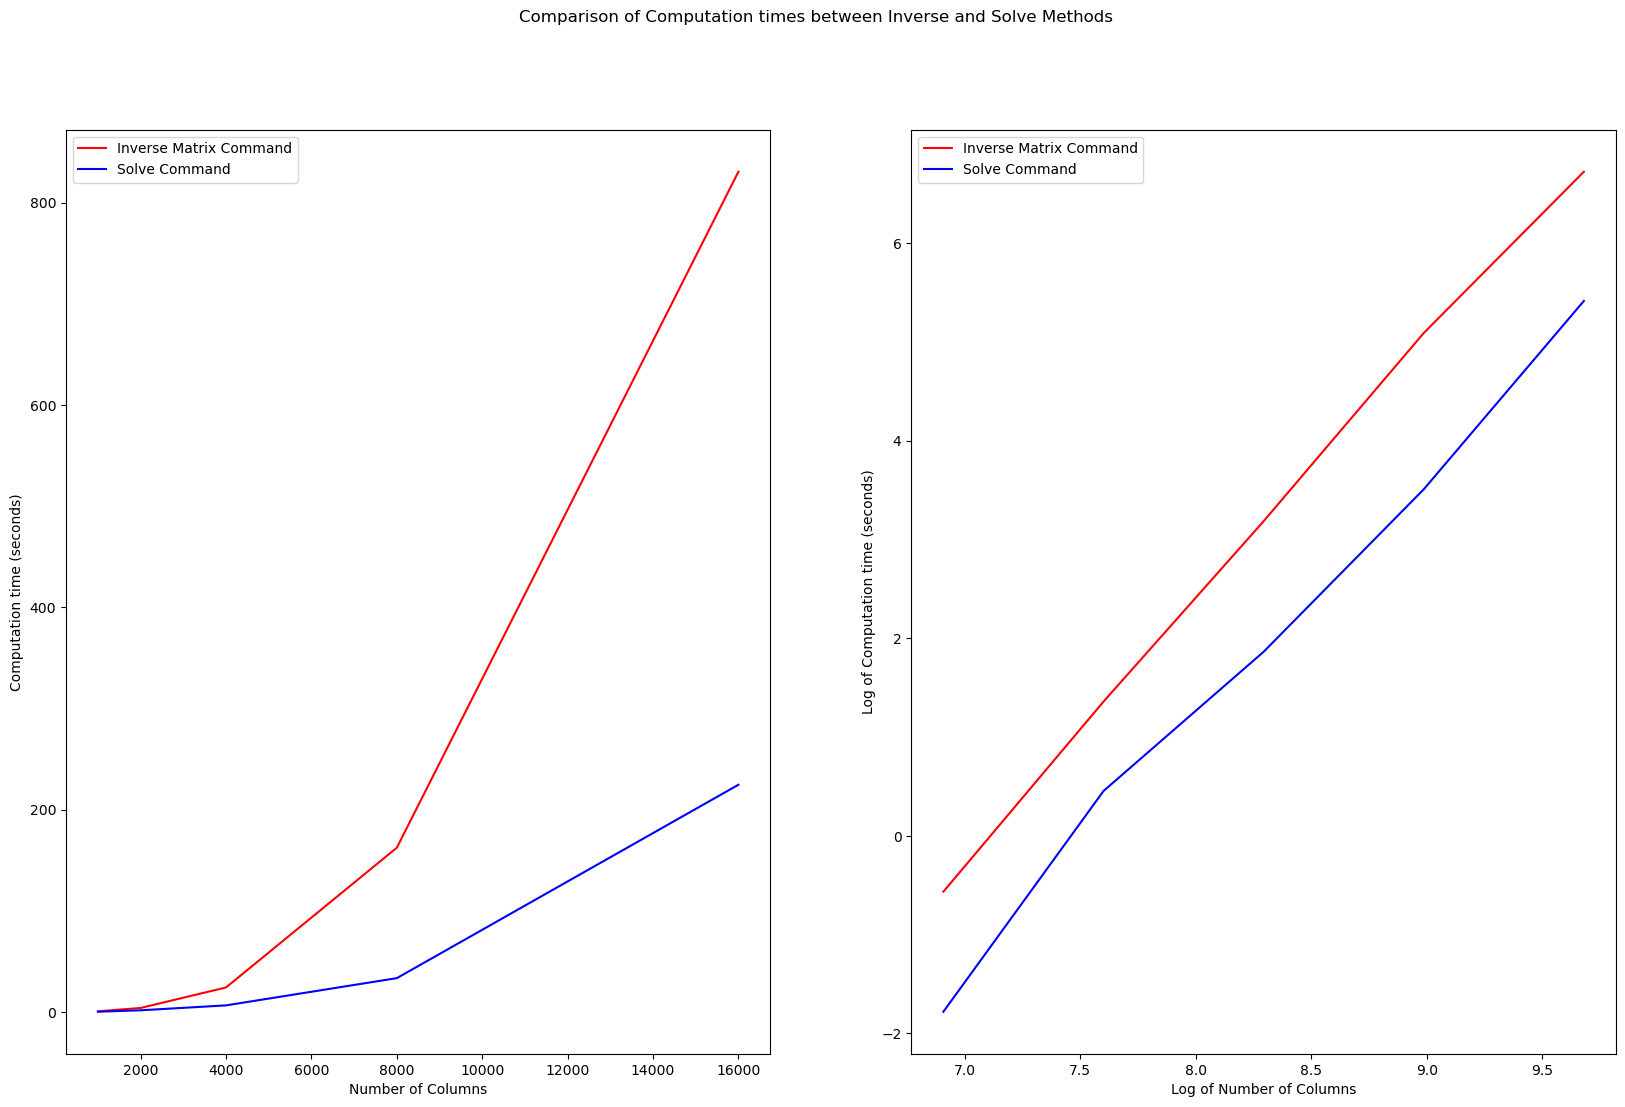

In [9]:
fig, ax = plt.subplots(1, 2, sharey = False, figsize = (20, 12))

# plot time vs N
ax[0].plot(N, comp_times_inv, color = 'r', label = 'Inverse Matrix Command')
ax[0].plot(N, comp_times_solve, color = 'b', label = 'Solve Command')
ax[0].set(xlabel = 'Number of Columns', ylabel = 'Computation time (seconds)')
ax[0].legend()

# plot log(time) vs log(N)
ax[1].plot(np.log(N), np.log(comp_times_inv), color = 'r', label = 'Inverse Matrix Command')
ax[1].plot(np.log(N), np.log(comp_times_solve), color = 'b', label = 'Solve Command')
ax[1].set(xlabel = 'Log of Number of Columns', ylabel = 'Log of Computation time (seconds)')
ax[1].legend()

fig.suptitle("Comparison of Computation times between Inverse and Solve Methods")

For solving the least squares problem with a matrix of at least 4000 columns, both the inverse and solve methods took about the same time to compute (some minor differences seen in the log graph). However, when the matrix has more than 4000 columns the time it takes for the inverse method shoots up drastically compared to the solve method.